In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [1]:
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")df = pd.read_excel(dosya_yolu)

SyntaxError: invalid syntax (4110267730.py, line 1)

In [3]:
print(df.shape)
print(df.info())
print(df.head())

(2235, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB
None
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135 

In [4]:
df = df.dropna(subset=['TedaviSuresi'])

In [6]:
categorical_cols = ['Cinsiyet','KanGrubu','Uyruk','KronikHastalik','Bolum','Alerji','Tanilar','TedaviAdi','UygulamaYerleri']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [7]:
df['TedaviSuresi'] = df['TedaviSuresi'].astype(str).str.extract(r'(\d+)').astype(int)
df['UygulamaSuresi'] = df['UygulamaSuresi'].astype(str).str.extract(r'(\d+)').astype(float)

In [8]:
df['ToplamUygulamaSuresi'] = df['TedaviSuresi'] * df['UygulamaSuresi']

In [9]:
def yas_grubu(yas):
    if yas < 18:
        return 'Çocuk'
    elif yas < 35:
        return 'Genç'
    elif yas < 60:
        return 'Orta Yaş'
    else:
        return 'Yaşlı'

df['Yas_Grubu'] = df['Yas'].apply(yas_grubu)

In [10]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

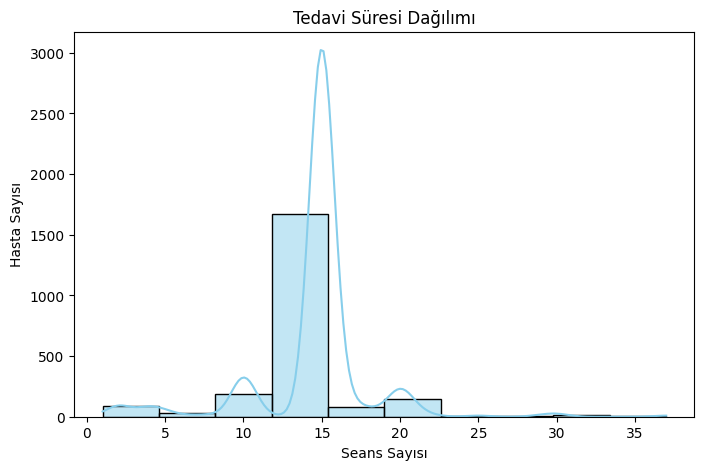

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['TedaviSuresi'], bins=10, kde=True, color='skyblue')
plt.title('Tedavi Süresi Dağılımı')
plt.xlabel('Seans Sayısı')
plt.ylabel('Hasta Sayısı')
plt.show()

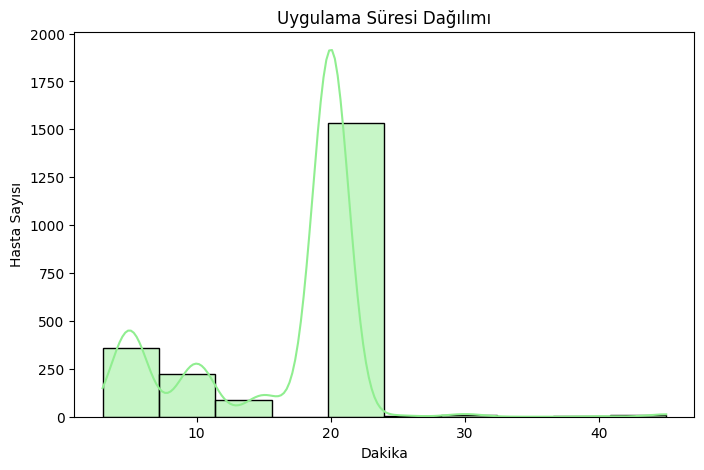

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['UygulamaSuresi'], bins=10, kde=True, color='lightgreen')
plt.title('Uygulama Süresi Dağılımı')
plt.xlabel('Dakika')
plt.ylabel('Hasta Sayısı')
plt.show()

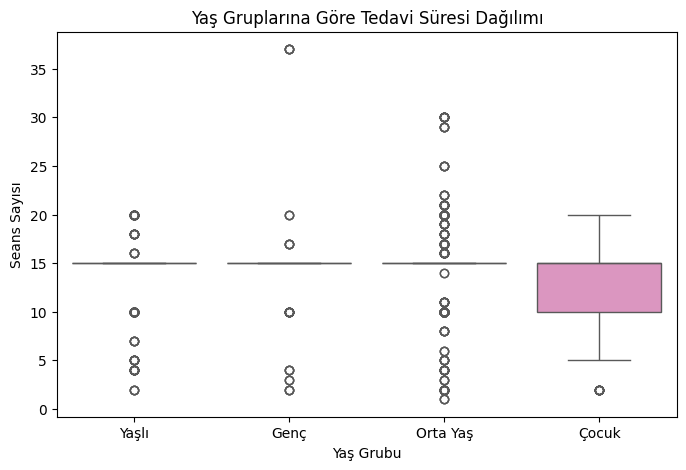

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Yas_Grubu',
    y='TedaviSuresi',
    data=df,
    hue='Yas_Grubu',   # Ekledik
    palette='Set2',
    dodge=False,
    legend=False       # Ekledik
)
plt.title('Yaş Gruplarına Göre Tedavi Süresi Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Seans Sayısı')
plt.show()


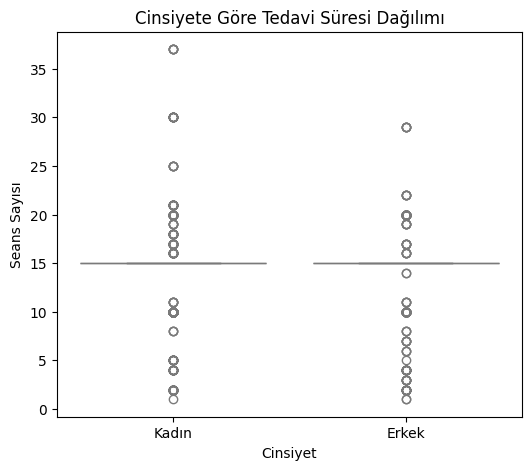

In [16]:
plt.figure(figsize=(6,5))
sns.boxplot(
    x='Cinsiyet',
    y='TedaviSuresi',
    data=df,
    hue='Cinsiyet',      # Ekledik
    palette='Pastel1',
    dodge=False,
    legend=False         # Ekledik
)
plt.title('Cinsiyete Göre Tedavi Süresi Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Seans Sayısı')
plt.show()


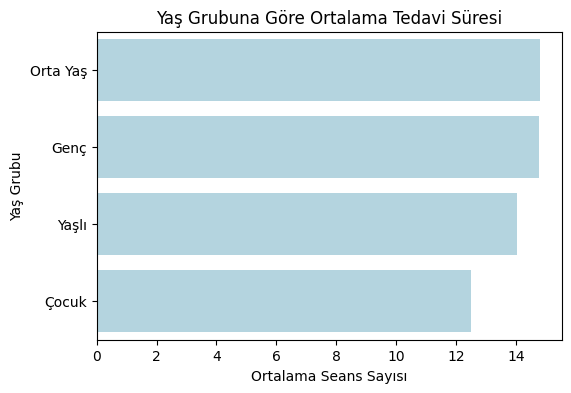

In [18]:
yas_ortalama = df.groupby('Yas_Grubu')['TedaviSuresi'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(
    x=yas_ortalama.values,
    y=yas_ortalama.index,
    color='lightblue'   # Tek renk
)
plt.title('Yaş Grubuna Göre Ortalama Tedavi Süresi')
plt.xlabel('Ortalama Seans Sayısı')
plt.ylabel('Yaş Grubu')
plt.show()


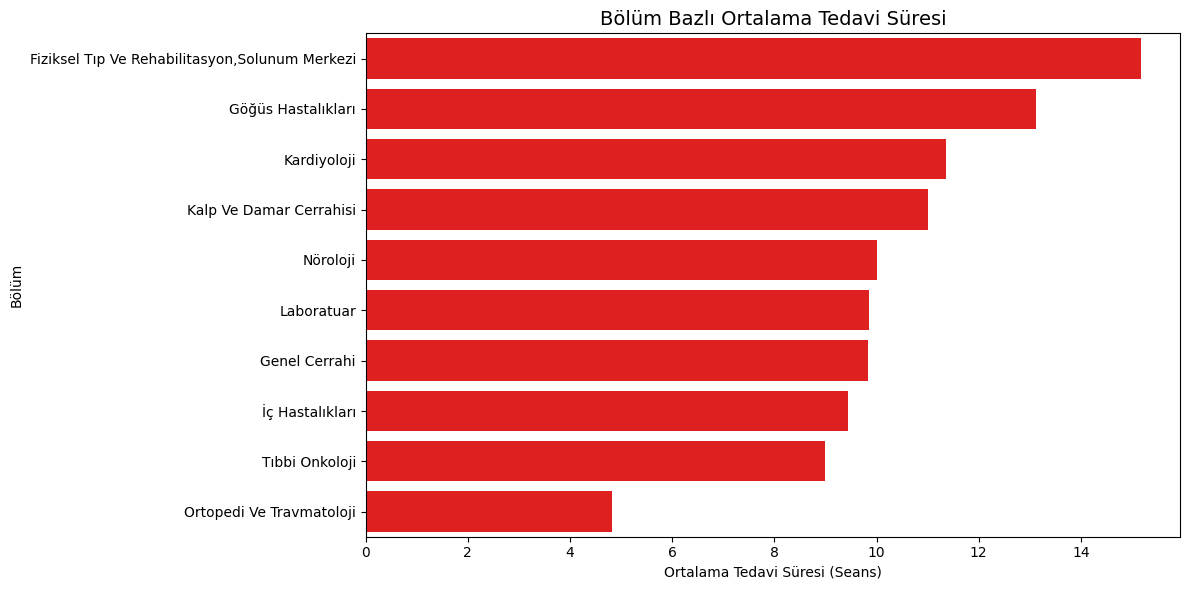

In [19]:
bolum_ortalama = df.groupby('Bolum')['TedaviSuresi'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=bolum_ortalama.values, y=bolum_ortalama.index, color='red')
plt.xlabel('Ortalama Tedavi Süresi (Seans)')
plt.ylabel('Bölüm')
plt.title('Bölüm Bazlı Ortalama Tedavi Süresi', fontsize=14)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

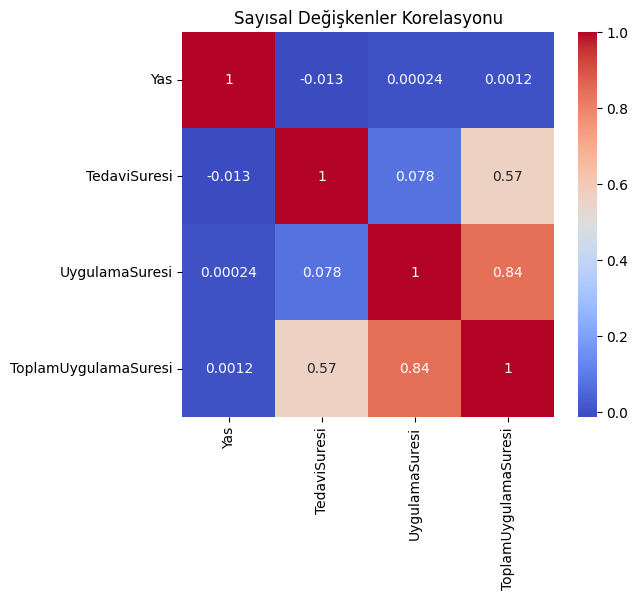

In [20]:
numeric_cols = ['Yas', 'TedaviSuresi', 'UygulamaSuresi', 'ToplamUygulamaSuresi']
corr = df[numeric_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Sayısal Değişkenler Korelasyonu')
plt.show()

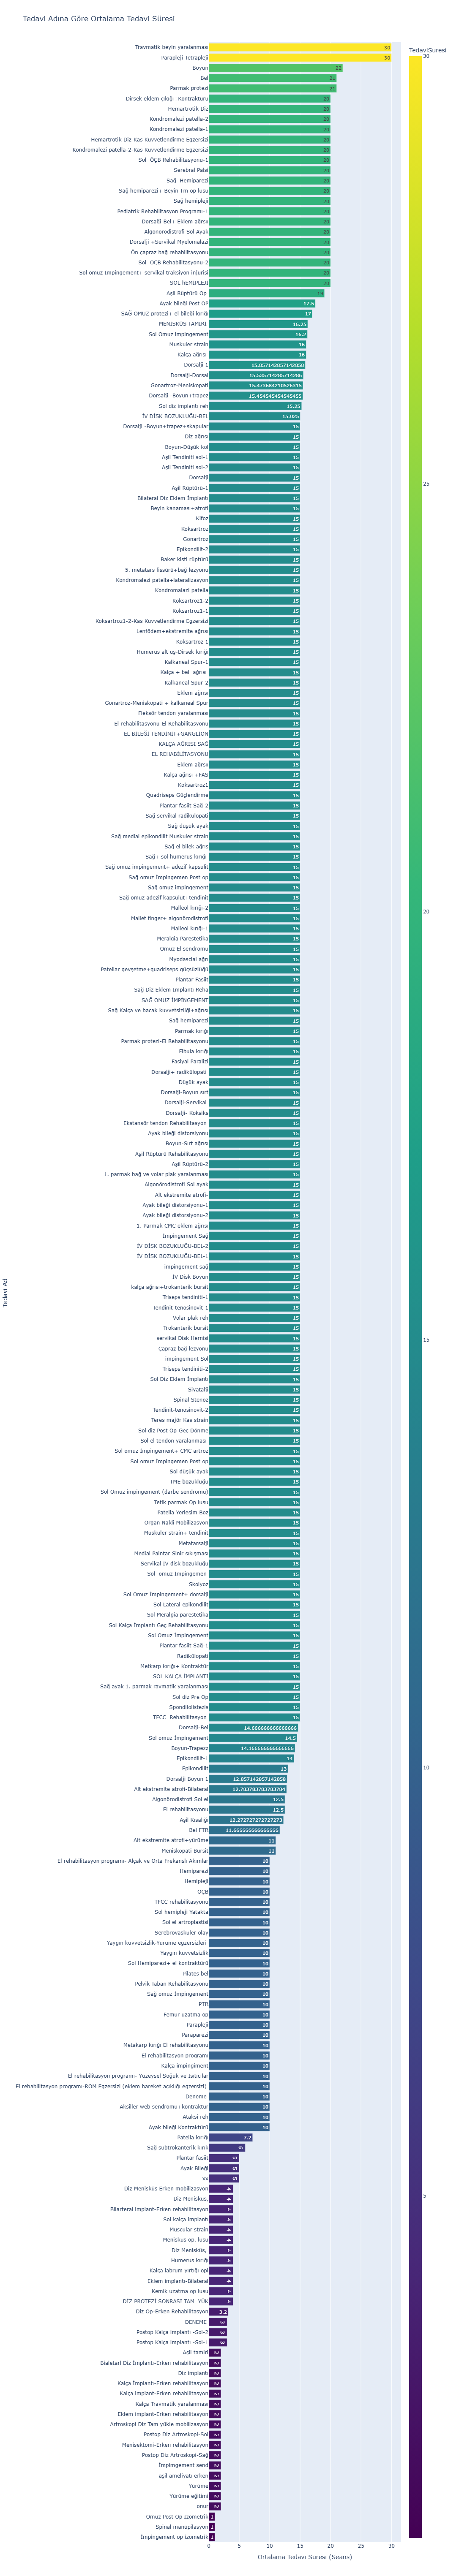

In [22]:
import plotly.express as px

tedavi_ortalama = (
    df.groupby('TedaviAdi')['TedaviSuresi']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    tedavi_ortalama,
    x='TedaviSuresi',
    y='TedaviAdi',
    orientation='h',
    text='TedaviSuresi',
    color='TedaviSuresi',
    color_continuous_scale='Viridis',
    title='Tedavi Adına Göre Ortalama Tedavi Süresi'
)

fig.update_layout(
    yaxis=dict(autorange="reversed"),
    xaxis_title='Ortalama Tedavi Süresi (Seans)',
    yaxis_title='Tedavi Adı',
    height=tedavi_ortalama.shape[0]*25,
    width=1000   # 👈 genişliği arttırdık
)

fig.show()


In [23]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
